In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler



ModuleNotFoundError: No module named 'sklearn'

In [26]:
data = pd.read_csv('train.csv')

data.replace(-1, np.nan, inplace=True)
period = pd.PeriodIndex(year=data["year"],month=data["month"],day=data["day"],hour=data["hour"],freq="H")
# period
data["date_time"] = period
data.set_index(["date_time"],inplace=True)


# Drop rows with missing data
data = data.iloc[24:].fillna(method = 'ffill')

data = data.join(pd.get_dummies(data.cbwd))
del data['cbwd']


data = data.drop(['No','year','month','day','hour'], axis=1)
data.head()

# data.shape[0]

C:\Users\User\AppData\Local\Temp\ipykernel_17352\2528647765.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.iloc[24:].fillna(method = 'ffill')


,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NE,NW,SE,cv
date_time,,,,,,,,,,,
2010-01-02 00:00,129.0,-16.0,-4.0,1020.0,1.79,0,0,False,False,True,False
2010-01-02 01:00,148.0,-15.0,-4.0,1020.0,2.68,0,0,False,False,True,False
2010-01-02 02:00,159.0,-11.0,-5.0,1021.0,3.57,0,0,False,False,True,False
2010-01-02 03:00,181.0,-7.0,-5.0,1022.0,5.36,1,0,False,False,True,False
2010-01-02 04:00,138.0,-7.0,-5.0,1022.0,6.25,2,0,False,False,True,False


<Axes: xlabel='date_time'>

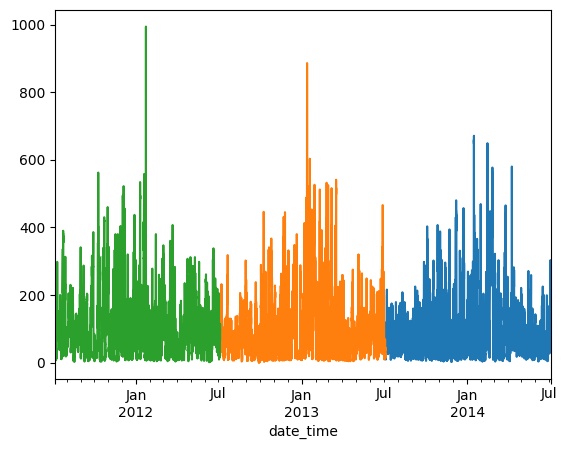

In [23]:
data['pm2.5'][-365*24:].plot()
data['pm2.5'][-365*24*2:-365*24].plot()
data['pm2.5'][-365*24*3:-365*24*2].plot()